In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib


In [4]:
!pip install tensorflow_probability --user --upgrade
!pip install tensorflow --user --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.1.1
    Uninstalling cloudpickle-1.1.1:
      Successfully uninstalled cloudpickle-1.1.1
  Attempting uninstall: tensorflow_probability
    Found existing installation: tensorflow-probability 0.8.0rc0
    Uninstalling tensorflow-probability-0.8.0rc0:
      Successfully uninstalled tensorflow-probability-0.8.0rc0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf

In [2]:
import tensorflow_probability as tfp

Background: 
- Cold days = 0; hot days = 1
- First day = 80% chance of being cold
- Cold day being followed by hot day = 40%
- Hot day being followed by cold day = 28%
- Cold day: mean = 0; STDev = 5
- Hot day: mean = 15; STDev = 10

In [35]:
tfd = tfp.distributions

# First day has 80% being cold and 20% being hot
first = tfd.Categorical(probs=[0.8, 0.2]) 

# Then, next day 30% being hot and 70% being cold, or if first was a hot day, then 80% being hot and 20% being cold
next = tfd.Categorical(probs=[[0.6, 0.4], [0.28, 0.72]])

# Mean and Standard Deviations for Cold and Hot days; loc = mean and scale = stDev
obs_dist = tfd.Normal(loc=[0.,15.], scale=[5., 10.])




In [36]:
hidden_markov_model = tfd.HiddenMarkovModel(initial_distribution = first, 
                                           transition_distribution = next,
                                           observation_distribution = obs_dist,
                                           num_steps = 7)



In [37]:
mean = hidden_markov_model.mean()

# Assuming that the first day I chose was Monday: 

print("Monday = " + str(mean[0]))
print("Tuesday = " + str(mean[1]))
print("Wednesday = " + str(mean[2]))
print("Thursday = " + str(mean[3]))
print("Friday = " + str(mean[4]))
print("Saturday = " + str(mean[5]))
print("Sunday = " + str(mean[6]))

Monday = tf.Tensor(3.0, shape=(), dtype=float32)
Tuesday = tf.Tensor(6.96, shape=(), dtype=float32)
Wednesday = tf.Tensor(8.2272005, shape=(), dtype=float32)
Thursday = tf.Tensor(8.632704, shape=(), dtype=float32)
Friday = tf.Tensor(8.762466, shape=(), dtype=float32)
Saturday = tf.Tensor(8.803989, shape=(), dtype=float32)
Sunday = tf.Tensor(8.817278, shape=(), dtype=float32)


In [38]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

Text(0, 0.5, 'Temperature')

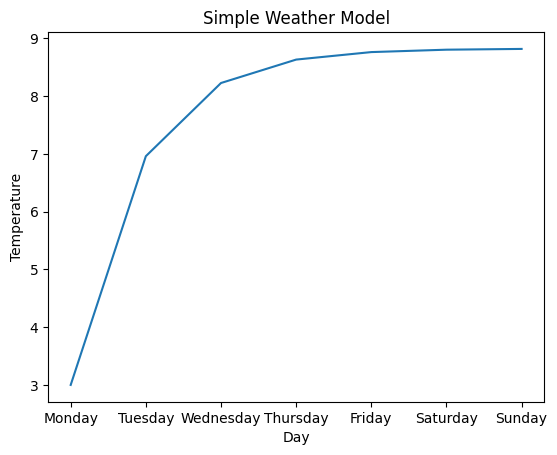

In [39]:
plt.title("Simple Weather Model")
plt.plot(week, mean)
plt.xlabel("Day")
plt.ylabel("Temperature")